# Visualizing Earnings Based On College Majors - Dataquest Practice Project

This project focuses on visualizing the earnings of US college graduates based on college majors. The data covers graduates between years 2010 and 2012. The original data was released by American Community Survey. The dataset was cleaned by FiveThirtyEight. The cleaned dataset can be downloaded from their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).



First necessary libraries are imported and the environment is prepared

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

Next the dataset is prepared and basic attributes of the dataset are explored.

The dataset has 173 rows of data with 21 different columns. One row seem to be missing data for gender related columns.

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

print(recent_grads.shape)
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

(173, 21)
Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
 

The rows with missing values are dropped from the dataset. The cleaned dataset has 172 rows of data.

In [3]:
recent_grads = recent_grads.dropna()
print(recent_grads.shape)
print(recent_grads.describe())

(172, 21)
             Rank   Major_code          Total            Men          Women  \
count  172.000000   172.000000     172.000000     172.000000     172.000000   
mean    87.377907  3895.953488   39370.081395   16723.406977   22646.674419   
std     49.983181  1679.240095   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.750000  2403.750000    4549.750000    2177.500000    1778.250000   
50%     87.500000  3608.500000   15104.000000    5434.000000    8386.500000   
75%    130.250000  5503.250000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size      Employed      Full_time      Part_time  \
count  172.000000   172.000000     172.00000     172.000000     172.000000   
mean     0.522223   357.941860   31355.80814   26165.767442    8877.232558   
std      0.231205   619.680419   50777.42865

#### Next different relations in the dataset are explored using scatter plots.

Based on the visualizations it seems that:

- Students in most popular majors (most male and female graduates) get average income. Popularity of a major does not explain that well income level. In majors with fewer graduates there seem to be more variety in income levels. 
- Students majoring in subjects with majority of female students earn less than students majoring in subjects with male majority.
- The link between number of full-time employees (with a specific major) and median salary seems quite similar with the relation between the popularity of majors and median salary. In other words the major with most full-time employees get average income and the majors with fewer number of full-time employees have more variety in the median incomes.


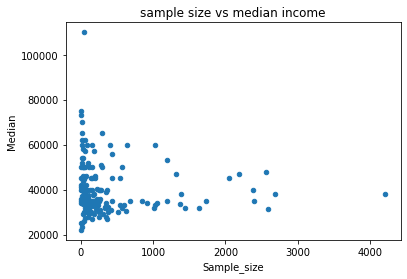

In [4]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter", title="sample size vs median income")

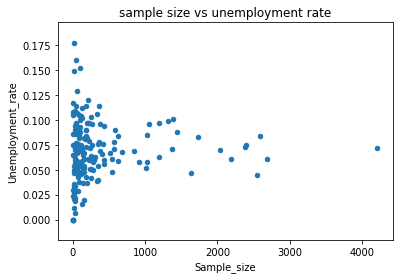

In [5]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter", title="sample size vs unemployment rate")

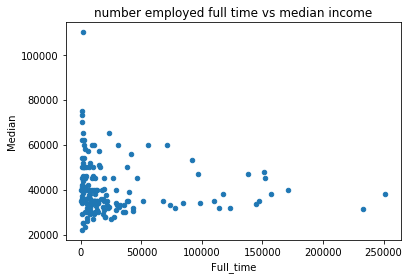

In [6]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter", title="number employed full time vs median income")

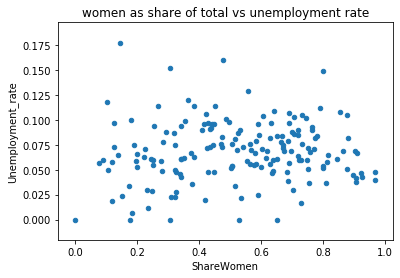

In [7]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter", title="women as share of total vs unemployment rate")

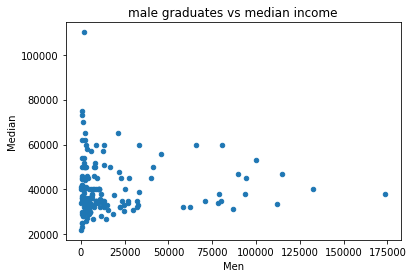

In [8]:
recent_grads.plot(x="Men", y="Median", kind="scatter", title="male graduates vs median income")

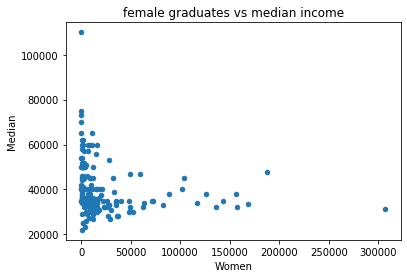

In [9]:
recent_grads.plot(x="Women", y="Median", kind="scatter", title="female graduates vs median income")

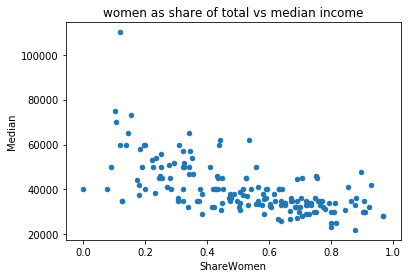

In [10]:
recent_grads.plot(x="ShareWomen", y="Median", kind="scatter", title="women as share of total vs median income")

#### Next distribution of certain columns are explored using histograms.

It seems that approximately 40% of majors are predominantly male and 60% female.

The most common median salary range seem to be approximately between 30 000 and 40 000.

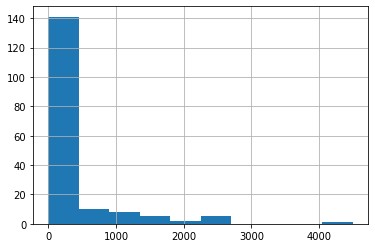

In [11]:
recent_grads["Sample_size"].hist(bins=10, range=(0, 4500))

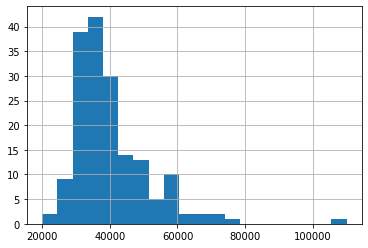

In [12]:
recent_grads["Median"].hist(bins=20, range=(20000, 110000))

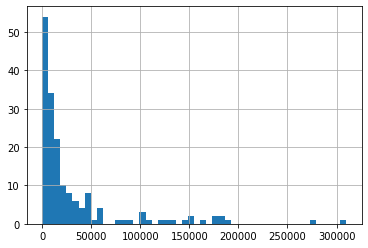

In [13]:
recent_grads["Employed"].hist(bins=50, range=(0, 310000))

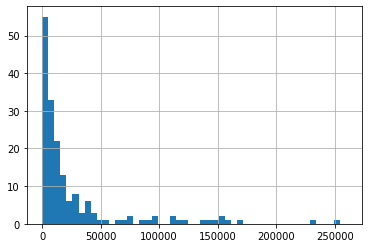

In [14]:
recent_grads["Full_time"].hist(bins=50, range=(0, 260000))

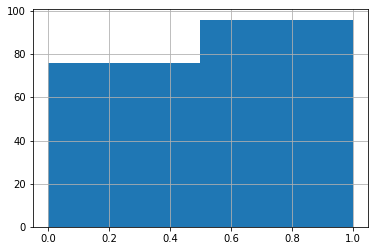

In [15]:
recent_grads["ShareWomen"].hist(bins=2, range=(0, 1))

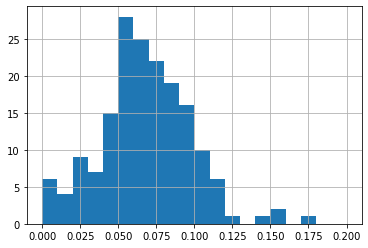

In [16]:
recent_grads["Unemployment_rate"].hist(bins=20, range=(0, 0.2))

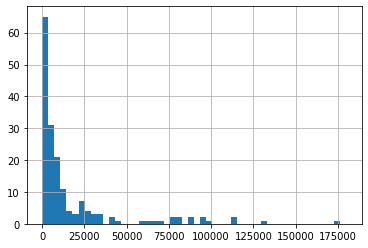

In [17]:
recent_grads["Men"].hist(bins=50, range=(0, 180000))

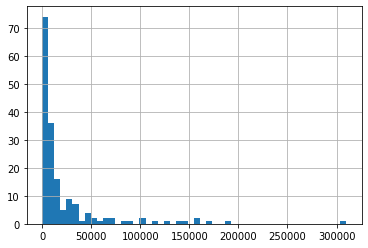

In [18]:
recent_grads["Women"].hist(bins=50, range=(0, 310000))

#### Next scatter matrix is utilized for data visualizations.

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AD16ECB08>,
      dtype=object)

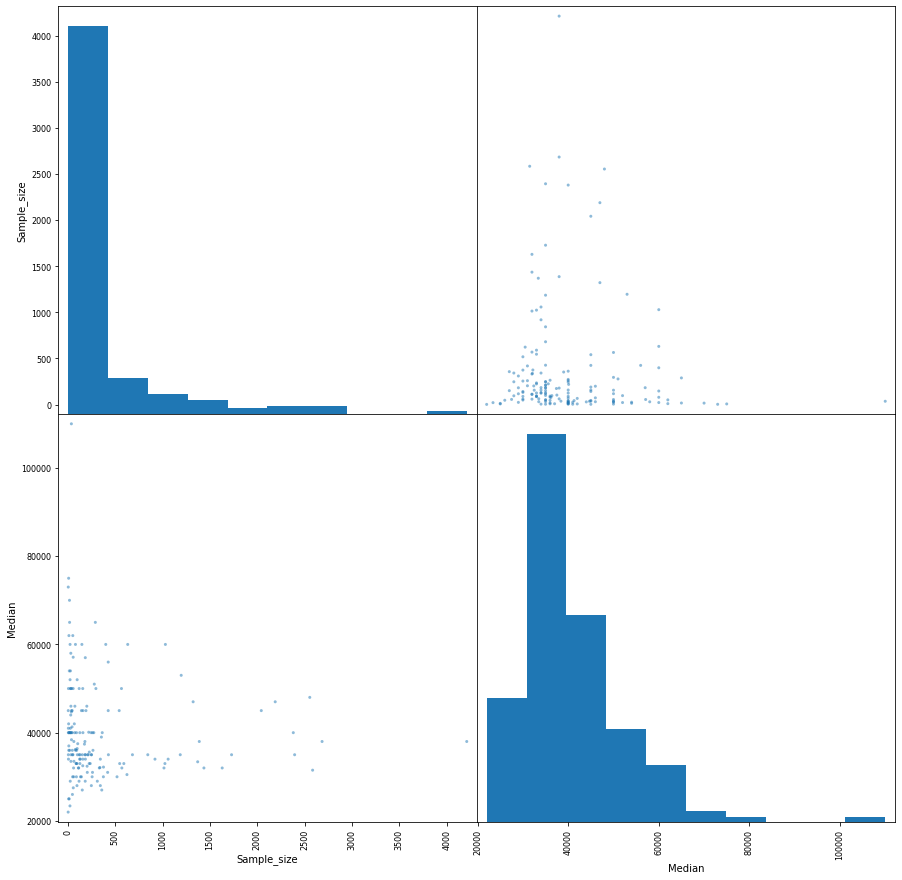

In [20]:
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AD3DF6D48>,
      dtype=object)

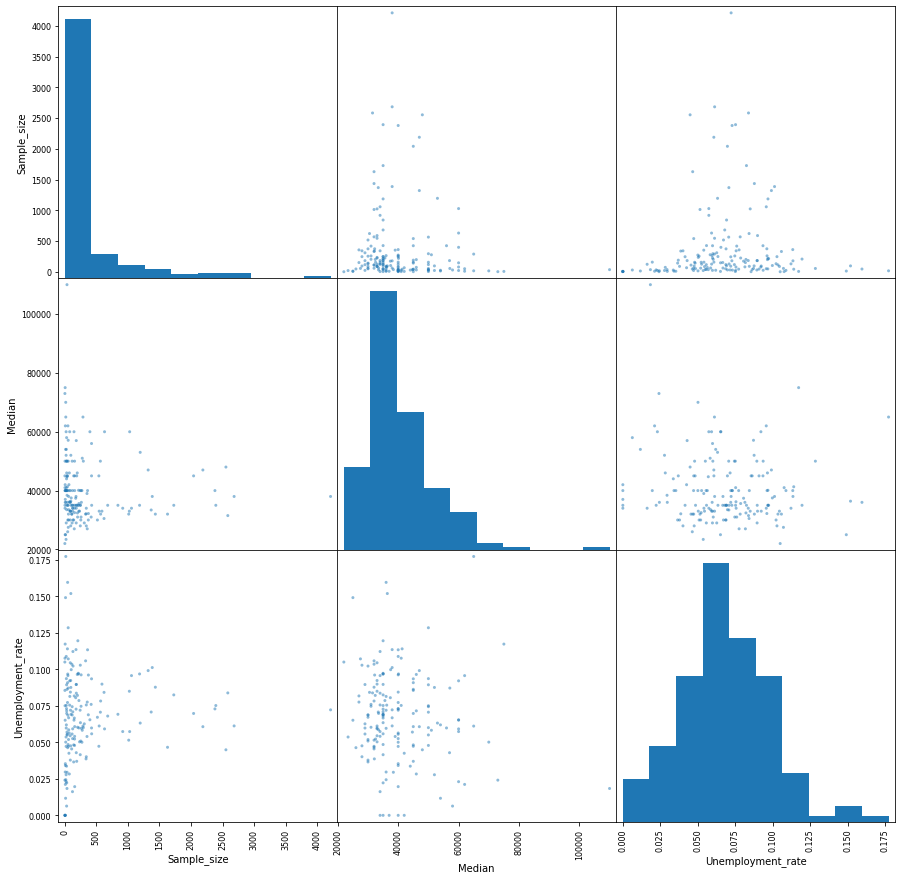

In [21]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(15,15))

Do students in more popular majors make more money?
 
The level of earnings is measured with median salary of full-time year-round employees. From the dataset probably the best measure for popularity of a major is the total number of students with the major.

Based on the scatter matrix, total number of students correlates heavily with the number of full-time employees (with the major), so median salary of full-time year-round employees is sufficient measure of general earnings level. Based on the scatter matrix, students in more popular majors are not making more money. On the contrary, the highest median salaries (but also the lowest) can be found in majors with least number of students.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AD3F9E2C8>,
      dtype=object)

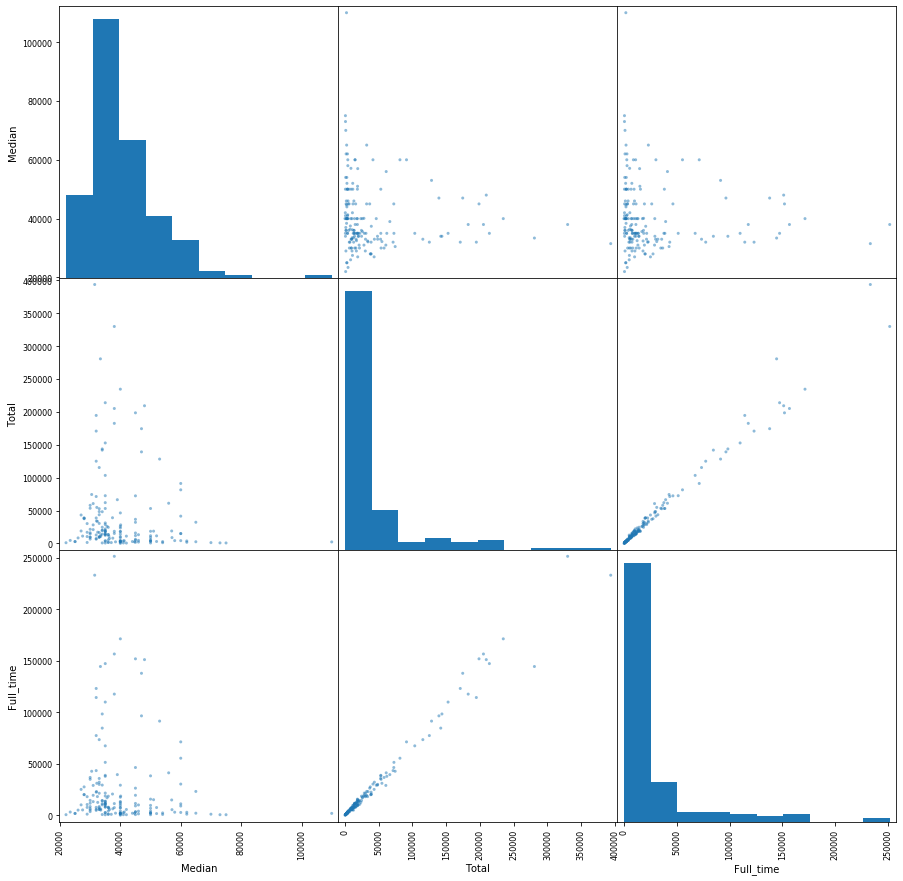

In [23]:
scatter_matrix(recent_grads[["Median", "Total", "Full_time"]], figsize=(15,15))

Do students that majored in subjects that were majority female make more money?

Based on the scatter matrix, students that majored in subjects with higher share of women make less money than in subjects with lower share of women. However, the correlation doesn't seem that strong, and there seem to be a lot of variety in earnings at different share of female students.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AD4A02D88>,
      dtype=object)

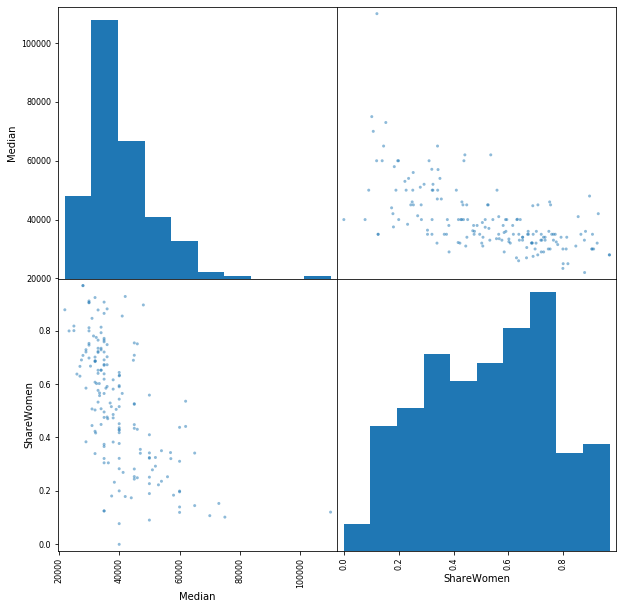

In [25]:
scatter_matrix(recent_grads[["Median", "ShareWomen"]], figsize=(10,10))

Is there any link between the number of full-time employees and median salary?

Based on the scatter matrix, there doesn't seem to be strong correlation between number of full-time employees and median salary. There might be a weak negative correlation, meaning that majors with more full-time employees earn less.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AD4FCAE08>,
      dtype=object)

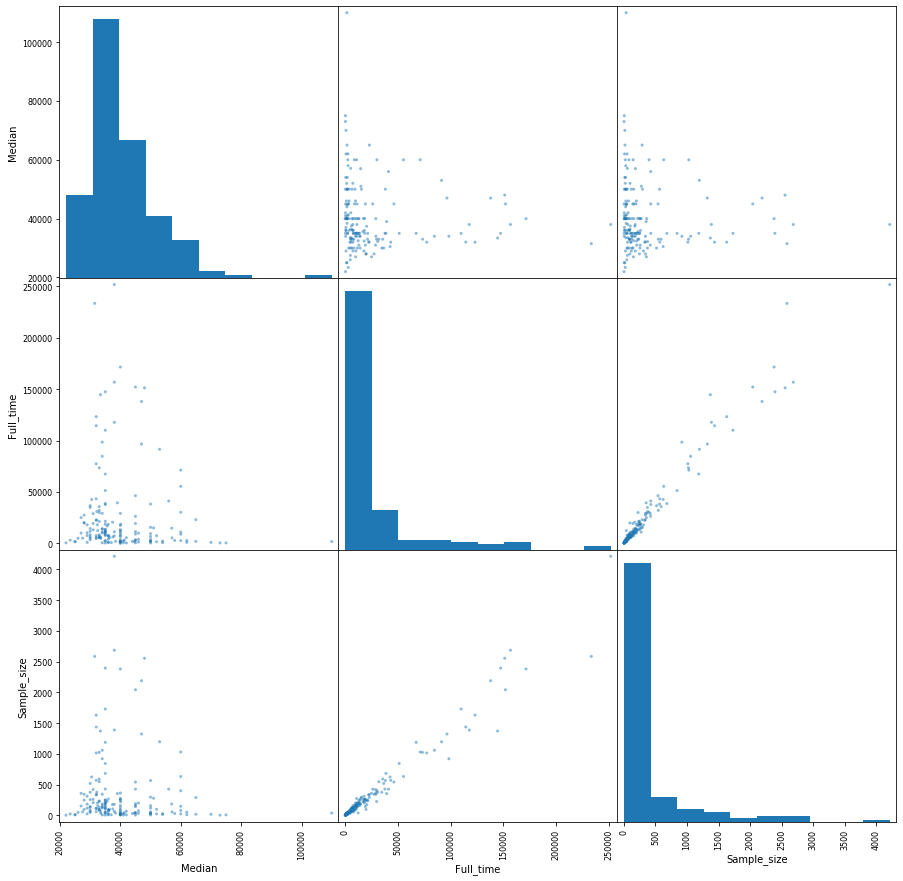

In [26]:
scatter_matrix(recent_grads[["Median", "Full_time", "Sample_size"]], figsize=(15,15))

#### Finally bar plots are used for data analysis.

Based on the share of women bar plots of 10 first majors (highest median earnings) and 10 last majors (lowest median earnings), the highest earning majors are on average predominantly male and the lowest earning majors predominantly female.

The unemployment rate on the other hand seems to be on average at quite similar levels at the 10 first and 10 last majors.

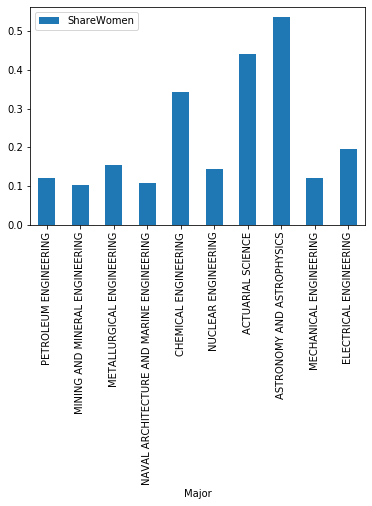

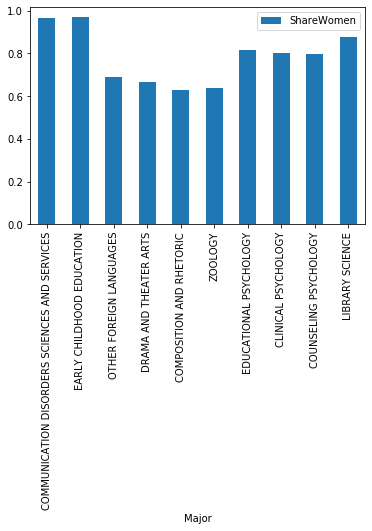

In [32]:
recent_grads[:10].plot.bar(x="Major", y="ShareWomen")
recent_grads[-10:].plot.bar(x="Major", y="ShareWomen")

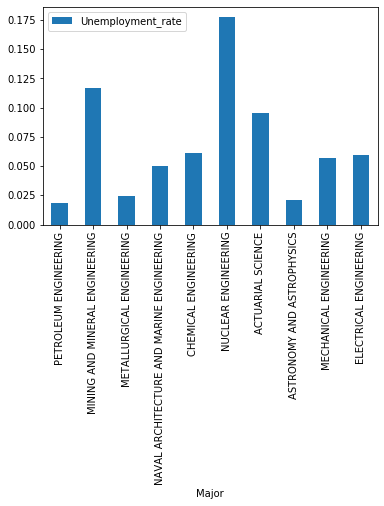

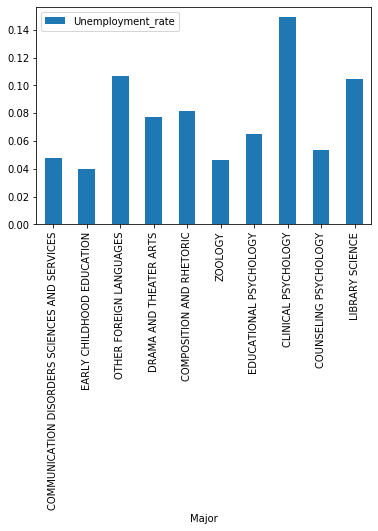

In [33]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate")
recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate")